# TMDB Analysis: Modeling...still testing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from datetime import datetime as dt

%matplotlib inline

path = "/Users/emiller/Documents/sf_tech/sf_datasets/"

columns = ["id","title","vote_average","vote_count","status","release_date","revenue","runtime","original_title","popularity","genres","production_countries"]
movies_df = pd.read_csv(path + "TMDB_movie_dataset_v11.csv", usecols=columns)

print('complete')


complete


In [ ]:
# This cell is used to create the holiday flag using USFederalHolidayCalendar instead of 'holidays' packages

from pandas.tseries.holiday import USFederalHolidayCalendar

# Step 1: Initialize calendar and generate holiday dates
cal = USFederalHolidayCalendar()
holiday_index = cal.holidays(start='1980-01-01', end='2030-12-31')  # DatetimeIndex

# Step 2: Convert to native datetime.date objects for exact matching
holiday_dates = set(holiday_index.date)

# Step 3: Ensure release_date is datetime.date
movies_df['release_date'] = pd.to_datetime(movies_df['release_date']).dt.date

# Step 4: Match on full date
movies_df['holiday_flag'] = movies_df['release_date'].isin(holiday_dates)




In [4]:
# Create additional model variables: release_day_of_year, release_year
# filter for only movies release between 1980 and 2050

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_day_of_year'] = movies_df['release_date'].dt.dayofyear
movies_df['release_year'] = movies_df['release_date'].dt.year


movies = movies_df[(movies_df['release_year'] > 1980) & (movies_df['release_year'] < 2050)]
movies = movies.copy()

movies.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,original_title,popularity,genres,production_countries,holiday_flag,release_day_of_year,release_year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,Inception,83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America",False,196.0,2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,Interstellar,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",False,309.0,2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",False,198.0,2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",False,349.0,2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,The Avengers,98.082,"Science Fiction, Action, Adventure",United States of America,False,116.0,2012.0


#### Correlation Analysis

In [57]:

movies_corr = movies.drop(["id","title","original_title","genres","release_date","production_countries"], axis="columns")
movies_corr.head()




,vote_average,vote_count,status,revenue,runtime,popularity,holiday_flag,release_day_of_year,release_year
0,8.364,34495,Released,825532764,148,83.952,False,196.0,2010.0
1,8.417,32571,Released,701729206,169,140.241,False,309.0,2014.0
2,8.512,30619,Released,1004558444,152,130.643,False,198.0,2008.0
3,7.573,29815,Released,2923706026,162,79.932,False,349.0,2009.0
4,7.710,29166,Released,1518815515,143,98.082,False,116.0,2012.0


In [58]:

# cleaning status field for analysis

movies_corr['status'] = movies_corr.status.str.lower().str.replace(" ","_")
movies_corr.head()


,vote_average,vote_count,status,revenue,runtime,popularity,holiday_flag,release_day_of_year,release_year
0,8.364,34495,released,825532764,148,83.952,False,196.0,2010.0
1,8.417,32571,released,701729206,169,140.241,False,309.0,2014.0
2,8.512,30619,released,1004558444,152,130.643,False,198.0,2008.0
3,7.573,29815,released,2923706026,162,79.932,False,349.0,2009.0
4,7.710,29166,released,1518815515,143,98.082,False,116.0,2012.0


In [59]:
movies_corr_dummies = pd.get_dummies(movies_corr.status)
movies_merged_all = movies_corr.join(movies_corr_dummies)
movies_merged_all.head()

,vote_average,vote_count,status,revenue,runtime,popularity,holiday_flag,release_day_of_year,release_year,canceled,in_production,planned,post_production,released,rumored
0,8.364,34495,released,825532764,148,83.952,False,196.0,2010.0,False,False,False,False,True,False
1,8.417,32571,released,701729206,169,140.241,False,309.0,2014.0,False,False,False,False,True,False
2,8.512,30619,released,1004558444,152,130.643,False,198.0,2008.0,False,False,False,False,True,False
3,7.573,29815,released,2923706026,162,79.932,False,349.0,2009.0,False,False,False,False,True,False
4,7.710,29166,released,1518815515,143,98.082,False,116.0,2012.0,False,False,False,False,True,False


In [60]:
movies_merged = movies_merged_all.drop(['canceled','status'], axis='columns')
movies_merged.head()

,vote_average,vote_count,revenue,runtime,popularity,holiday_flag,release_day_of_year,release_year,in_production,planned,post_production,released,rumored
0,8.364,34495,825532764,148,83.952,False,196.0,2010.0,False,False,False,True,False
1,8.417,32571,701729206,169,140.241,False,309.0,2014.0,False,False,False,True,False
2,8.512,30619,1004558444,152,130.643,False,198.0,2008.0,False,False,False,True,False
3,7.573,29815,2923706026,162,79.932,False,349.0,2009.0,False,False,False,True,False
4,7.710,29166,1518815515,143,98.082,False,116.0,2012.0,False,False,False,True,False


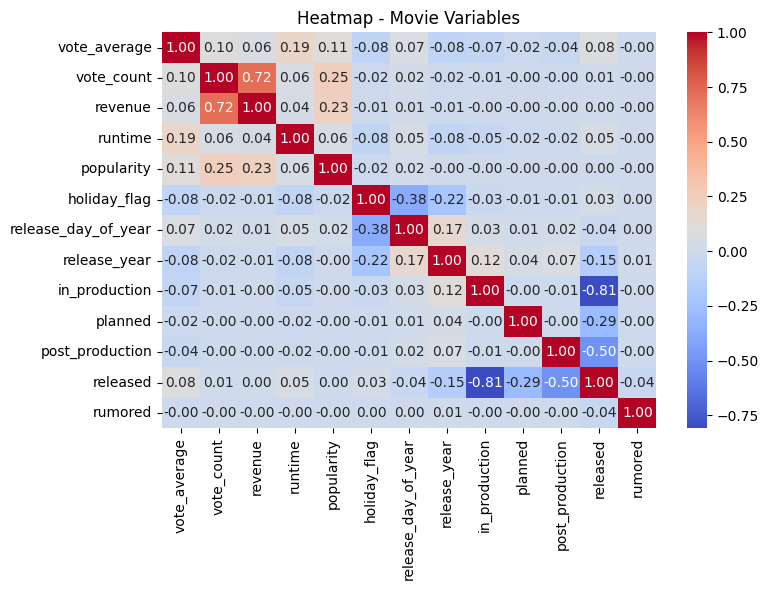

In [61]:
# Set seed for reproducibility
np.random.seed(0)

# Correlation matrix
correlation = movies_merged.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap - Movie Variables")
plt.tight_layout()
plt.show()

In [ ]:
# use VIF to determine multicollinearity 
# If a variable has VIF > 5 or 10, it might be multicollinear.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select your features - this model was also texting on dataframes one_var and some_vars. 
more_vars = movies_merged[["vote_average", "runtime", "popularity", "vote_count", "revenue", "release_day_of_year", "holiday_flag"]]
more_vars = more_vars.copy()

one_var = movies_merged[["vote_count","revenue"]].copy()
# some_vars = movies_merged[["popularity","vote_count","revenue","vote_average","runtime"]].copy()
# more_vars = movies_merged[["vote_average","runtime","popularity","vote_count","revenue","release_day_of_year","holiday_flag"]]

# convert holiday_flag to integer
more_vars["holiday_flag"] = more_vars["holiday_flag"].astype(int)

# Drop NA values to avoid errors
more_vars = more_vars.dropna()



# Add constant (intercept) for VIF calculation
X = add_constant(more_vars)

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


In [ ]:
"""
score and compare the results of the model using different variables
["id","title","vote_average","vote_count","status","release_date","revenue","runtime","original_title","popularity","genres","production_countries"]

"""

# X = more_vars.drop("revenue", axis="columns")
# y = more_vars["revenue"] 

# X = some_vars.drop("revenue", axis="columns")
# y = some_vars["revenue"]

# for using 1 variable, create 2D array
X = one_var.drop("revenue", axis="columns").to_numpy().reshape(-1,1)
y = one_var["revenue"] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

tmdb_model = linear_model.LinearRegression()
tmdb_model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
tmdb_model.predict(X_test)

array([1288913.47709765,  -54008.40141126,  -14510.69910217, ...,
        -54008.40141126,  -54008.40141126,  -54008.40141126])

In [85]:
tmdb_model.score(X_test, y_test)

0.5406933727321908

In [ ]:
"""
model scores outputs

some_vars = movies_merged[["popularity","vote_count","revenue"]]
some_vars == 0.49936127602895475

more_vars = movies_merged[["vote_average","runtime","popularity","vote_count","revenue","release_day_of_year","holiday_flag"]]
more_vars == 0.49331007093493406

some_vars = movies_merged[["popularity","vote_count","revenue","vote_average"]]
some_vars == 0.5385645984930001

some_vars = movies_merged[["popularity","vote_count","revenue","vote_average","runtime"]]
some_vars = 0.43542786585212645

one_var = movies_merged[["vote_count","revenue"]]
one_var = 0.5406933727321908
"""




In [91]:
# use VIF to determine multicollinearity 
# If a variable has VIF > 5 or 10, it might be multicollinear.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select your features
more_vars = movies_merged[["vote_average", "runtime", "popularity", "vote_count", "revenue", "release_day_of_year", "holiday_flag"]]
more_vars = more_vars.copy()

# convert holiday_flag to integer
more_vars["holiday_flag"] = more_vars["holiday_flag"].astype(int)

# Drop NA values to avoid errors
more_vars = more_vars.dropna()



# Add constant (intercept) for VIF calculation
X = add_constant(more_vars)

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


               feature       VIF
0                const  4.840941
1         vote_average  1.059153
2              runtime  1.043784
3           popularity  1.081700
4           vote_count  2.115849
5              revenue  2.088403
6  release_day_of_year  1.171293
7         holiday_flag  1.177418


In [93]:
# movies_corr = movies.drop(["id","title","original_title","genres","release_date","production_countries"], axis="columns")
movies.head(20)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,original_title,popularity,genres,production_countries,holiday_flag,release_day_of_year,release_year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,Inception,83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America",False,196.0,2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,Interstellar,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",False,309.0,2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",False,198.0,2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",False,349.0,2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,The Avengers,98.082,"Science Fiction, Action, Adventure",United States of America,False,116.0,2012.0
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,Deadpool,72.735,"Action, Adventure, Comedy",United States of America,False,40.0,2016.0
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,Avengers: Infinity War,154.340,"Adventure, Action, Science Fiction",United States of America,False,115.0,2018.0
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,Fight Club,69.498,Drama,United States of America,False,288.0,1999.0
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,Guardians of the Galaxy,33.255,"Action, Science Fiction, Adventure",United States of America,False,211.0,2014.0
9,680,Pulp Fiction,8.488,25893,Released,1994-09-10,213900000,154,Pulp Fiction,74.862,"Thriller, Crime",United States of America,False,253.0,1994.0


In [ ]:
# GET LIST OF top GENRES
# 'g_action', 'g_drama','g_thriller','g_adventure','g_science_fiction','g_fantasy','g_comedy','g_romance'

# movies.drop('g_action', axis='columns', inplace=True)
movies['g_action'] = movies['genres'].apply(lambda x: 'Action' in x.split(',') if isinstance(x, str) else False)
movies['g_drama'] = movies['genres'].apply(lambda x: 'Drama' in x.split(',') if isinstance(x, str) else False)
movies['g_thriller'] = movies['genres'].apply(lambda x: 'Thriller' in x.split(',') if isinstance(x, str) else False)
movies['g_adventure'] = movies['genres'].apply(lambda x: 'Adventure' in x.split(',') if isinstance(x, str) else False)
movies['g_science_fiction'] = movies['genres'].apply(lambda x: 'Science Fiction' in x.split(',') if isinstance(x, str) else False)
movies['g_fantasy'] = movies['genres'].apply(lambda x: 'Fantasy' in x.split(',') if isinstance(x, str) else False)
movies['g_comedy'] = movies['genres'].apply(lambda x: 'Comedy' in x.split(',') if isinstance(x, str) else False)
movies['g_romance'] = movies['genres'].apply(lambda x: 'Romance' in x.split(',') if isinstance(x, str) else False)
movies['g_crime'] = movies['genres'].apply(lambda x: 'Crime' in x.split(',') if isinstance(x, str) else False)

movies.head()


# next, see how these affect correlation in heatmap
# adding another comment to see whats hannen


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,original_title,popularity,...,release_year,g_action,g_drama,g_thriller,g_adventure,g_science_fiction,g_fantasy,g_comedy,g_romance,g_crime
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,Inception,83.952,...,2010.0,True,False,False,False,False,False,False,False,False
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,Interstellar,140.241,...,2014.0,False,False,False,True,False,False,False,False,False
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,The Dark Knight,130.643,...,2008.0,False,True,False,False,False,False,False,False,False
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,Avatar,79.932,...,2009.0,True,False,False,False,False,False,False,False,False
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,The Avengers,98.082,...,2012.0,False,False,False,False,True,False,False,False,False


# Appendix

In [ ]:
"""
testing for the issue with holiday flag returning false for every record. this function creates a dataset for holidays - 
both fixed and floating. the output consolidates fixed and floating holidays into 1 entity
"""

# def floating_holidays(start_year=1980, end_year=2030):
#     years = range(start_year, end_year + 1)
#     rules = {
#         'MLK': pd.offsets.Week(weekday=0, n=3),         # 3rd Monday Jan
#         'Pres': pd.offsets.Week(weekday=0, n=3),        # 3rd Monday Feb
#         'Mem': pd.offsets.LastWeekOfMonth(weekday=0),   # last Monday May
#         'Lab': pd.offsets.Week(weekday=0, n=1),         # 1st Monday Sep
#         'Col': pd.offsets.Week(weekday=0, n=2),         # 2nd Monday Oct
#         'Thanks': pd.offsets.Week(weekday=3, n=4),      # 4th Thursday Nov
#     }
#     month_map = {'MLK': 1, 'Pres': 2, 'Mem': 5, 'Lab': 9, 'Col': 10, 'Thanks': 11}
#     tuples = []
#     for yr in years:
#         for name, rule in rules.items():
#             month = month_map[name]
#             base = pd.Timestamp(f"{yr}-{month:02d}-01")
#             holiday_dt = (base + rule).date()
#             tuples.append((holiday_dt.month, holiday_dt.day))
#     return tuples

# fixed = [(1, 1), (6, 19), (7, 4), (11, 11), (12, 25)]
# floaters = floating_holidays(1980, 2030)
# all_holidays = set(fixed + floaters)
# all_holidays




In [ ]:
"""
look at connection between release_date vs revenue --> perhaps there is SOME seasonality around that
number of movies released per month
the overall ratings of movies in a year vs revenue

vote_average vs release_date
vote_count vs release_date
vote_count vs vote_average...if yes, then next
vote_count and release_date vs vote_average
vote_count vs revenue
vote_count vs popularity
popularity vs revenue
runtime vs revenue

genres (tag) vs revenue
genres (tag) vs popularity

alpha letter in title (1/0) vs revenue


how do all n variables affect revenue...are there variables to throw out to make a better model? 
how do you know (ask GPT)?
how do you know whether to add variable (ask GPT)?

variables to add:
count of genre tags (commas + 1)
count of characters in title

break out genres
get all available genres
create columns for each available genre

------will need to use get dummies:
genres
production_countries - could create df with only certain countries listed (US, Canada, UK)

# count of genre tags (commas + 1)


# movies_df["genre_tag_count"] = movies_df.genres.str.count(",").fillna(0).astype("int") + 1


movies_df.drop("comma_count", axis="columns", inplace=True)
movies_df

start here...either get a finite list of genres (to see how many...then those are the columns for model)
or...continue with model build, and leave the part above for later...right now, the second one sounds good because you are likely to come back to it to perfect the solution...

# count
# Drama, Horror, Comedy, Mystery, Thriller, Romance
# Thriller, Mystery, Adventure, War                         1
# Drama, Romance, Family, Adventure                         1
# Adventure, Family, Action, Science Fiction                1
# Drama, Music, Science Fiction, Mystery      
# , Documentary, Animation
"""